In [1]:
from ipynb.fs.defs.Neuron import SingleNeuron
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [2]:
from abc import ABC, abstractmethod
from tqdm import tqdm

class SingleNeuron(ABC):
    '''
    Generic class for a single artificial neuron.
    
    ATTRIBUTES
    
    METHODS
    '''
    weights = None    # weights for preactivation function. 1-dimenional column array.
    bias = None
        
    def predict(self, signal):
        '''
        Fires neuron. Computes preactivation value using weights and input signal. Then returns activation_function applied to the preactivation value.
        INPUT
            signal; the vector of data observations
        RETURNS
            scalar-valued preactivation value
        '''
        preactivation = np.matmul(signal, self.weights) + self.bias
        return self.activation(preactivation)

    
    def train(self, X_train, y_train, n_epoch, learning_rate=None):
        '''
        '''
        n_sample, n_features = X_train.shape
        if self.weights is None:
            self.weights = np.zeros((n_features, 1))
        if self.bias is None:
            self.bias = 0
        epoch_cost = np.zeros((n_epoch, ))
        prog = tqdm(range(n_epoch))
        for epc in prog:
            for ind in range(n_sample):
                signal = X_train[ind, :].reshape((1, n_features))
                predicted = self.predict(signal)[0]
                actual = y_train[ind, 0]
                self.update(actual, predicted, signal, learning_rate)
                epoch_cost[epc] += self.cost_function(actual, predicted, signal)
            prog.set_description("Cost: " + str(round(epoch_cost[epc], 5)))
            prog.update()
        return epoch_cost
    

    @abstractmethod
    def activation(self, preactivation):
        '''
        Given a preactivation scalar, returns the post-activation scalar output.
        INPUT
            preactivation; scalar-valued preactivation value
        RETURNS
            post-activation value, equivalent to the neuron's prediction
        '''
        pass
    
    @abstractmethod
    def update(self, actual, predicted, signal, learning_rate):
        '''
        '''
        pass
        
    @abstractmethod
    def cost_function(self, actual, predicted, signal):
        '''
        '''
        pass    
    

In [10]:
df = pd.read_csv('data/Brickset-Most-Owned-Query-33-02042023.csv')
df = df.filter(["Number", "Theme", "Pieces", "Weight"])
df = df[(df["Theme"] == "Duplo") | (df["Theme"] == "City")]
df = df.dropna()
df["Indicator"] = np.where(df["Theme"] == "Duplo", 1, -1)
n_sample = len(df.index)
print(df)
print("There are ", np.sum(df["Theme"] == "Duplo"), " Duplo sets.")
print("There are ", np.sum(df["Theme"] == "City"), " City sets.")

        Number  Theme  Pieces    Weight  Indicator
230    60097-1   City  1683.0  3.193288         -1
272    60271-1   City  1517.0  3.058000         -1
397    60198-1   City  1226.0  3.032000         -1
408    60200-1   City  1211.0  2.422000         -1
458    60336-1   City  1153.0  2.764000         -1
...        ...    ...     ...       ...        ...
14226  60236-1   City     2.0  0.200000         -1
14278  60237-1   City     2.0  0.200000         -1
14325   7280-1   City     2.0  0.195220         -1
14326   7281-1   City     2.0  0.195220         -1
14384   2304-1  Duplo     1.0  0.263320          1

[765 rows x 5 columns]
There are  276  Duplo sets.
There are  489  City sets.


In [4]:
X_train = df.filter(["Pieces", "Weight"]).values.reshape(-1, 2)
y_train = df["Indicator"].values.reshape(-1, 1)

In [5]:
class Perceptron(SingleNeuron):
    def activation(self, preactivation):
        '''
        '''
        return 2 * (preactivation > 0) - 1
    
    def update(self, actual, predicted, signal, learning_rate=None):
        '''
        '''
        self.weights = self.weights - 1/2 * (predicted - actual) * np.transpose(signal)
        self.bias = self.bias - 1/2 * (predicted - actual)

    def cost_function(self, actual, predicted, signal):
        '''
        '''
        return(actual != predicted)

In [12]:
p = Perceptron()
errors = p.train(X_train, y_train, n_epoch=300)

Cost: 33.0: 100%|██████████| 300/300 [00:09<00:00, 32.47it/s] 


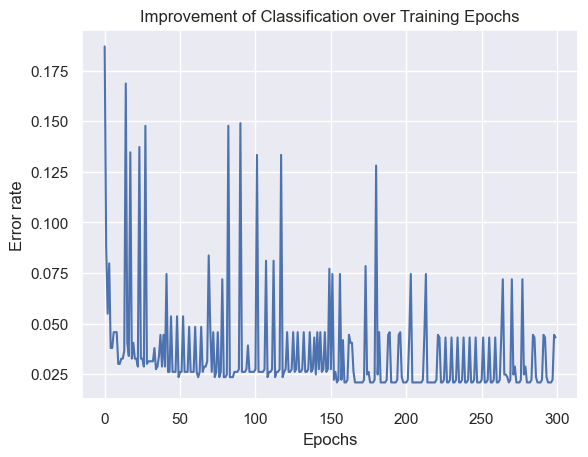

In [13]:
sns.set_theme()
plt.plot([err / n_sample for err in errors])
plt.title("Improvement of Classification over Training Epochs")
plt.xlabel("Epochs")
plt.ylabel("Error rate")
plt.show()

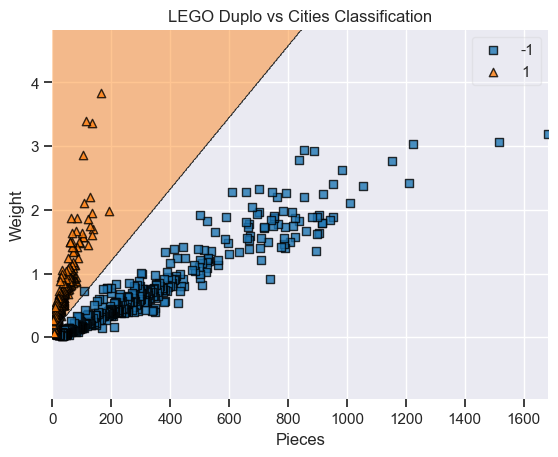

In [15]:
plot_decision_regions(X_train, y_train.reshape((-1,)), clf = p)
plt.title("LEGO Duplo vs Cities Classification")
plt.xlabel("Pieces")
plt.ylabel("Weight")
plt.show()